<a href="https://colab.research.google.com/github/SobiaNoorAI/Wholesale-Customer-Segmentation-and-Spending-Behavior-Analysis-By-ML/blob/main/K_Means_Clustering_Wholesale_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Load & Explore Dataset

In [30]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [31]:
#load data
Wholesale_df=pd.read_csv("https://raw.githubusercontent.com/SobiaNoorAI/Wholesale-Customer-Segmentation-and-Spending-Behavior-Analysis-By-ML/main/Data/Wholesale%20customers%20data.csv")
Wholesale_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [32]:
# Description of the dataset
Wholesale_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
# info of the dataset
Wholesale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
#shape
Wholesale_df.shape

(440, 8)

# 2) Preprocessing Data

## Clean Data

In [34]:
# Check Missing Values
Wholesale_df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [33]:
# Check Duplicate Values
Wholesale_df.duplicated().sum()

0

In [35]:
# Drop the first two columns as these are unnecessary
Wholesale_df = Wholesale_df.iloc[:, 2:]
Wholesale_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## Outliers

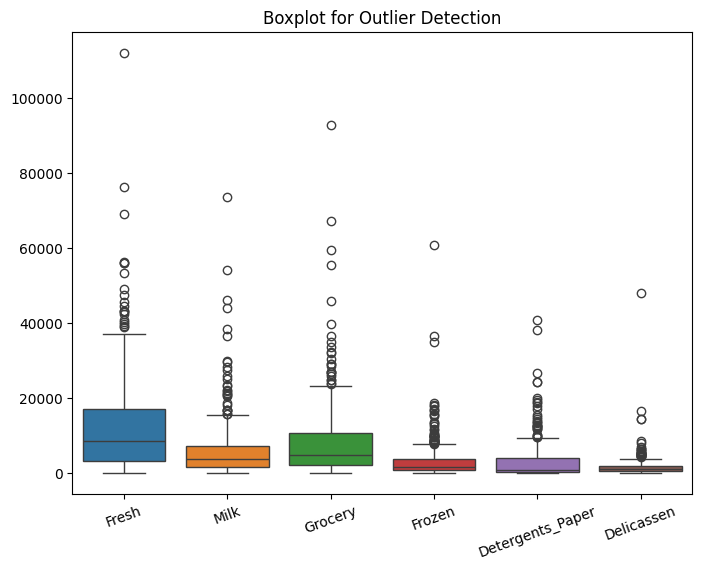

In [38]:
# Detect and Handle Outliers using Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=Wholesale_df)
plt.xticks(rotation=20)
plt.title("Boxplot for Outlier Detection")
plt.savefig('Boxplot for Outlier Detection.png')
plt.show()

## Z-Score

In [39]:
# Calculate z-scores for each value
z = np.abs((Wholesale_df - Wholesale_df.mean()) / Wholesale_df.std())

# Filter out values with z-score > 3
Wholesale_df_filtered = Wholesale_df[(z < 3).all(axis=1)]

# Print the shape of the original and filtered dataset
print("Original shape:", Wholesale_df.shape)
print("Filtered shape:", Wholesale_df_filtered.shape)

Original shape: (440, 6)
Filtered shape: (414, 6)


## Normalized Data

In [40]:
# Normalization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(Wholesale_df_filtered)
df_scaled[:5]

array([[ 0.19956882,  1.05140907,  0.11583669, -0.80184394,  0.09379788,
         0.08229138],
       [-0.37265498,  1.08525403,  0.42707868, -0.27046195,  0.28694383,
         0.44251008],
       [-0.44443787,  0.86504201,  0.13491131, -0.04973933,  0.3565263 ,
         5.43293721],
       [ 0.26033955, -0.80786612, -0.40212457,  1.32299747, -0.58236897,
         0.45237908],
       [ 1.213706  ,  0.11825511,  0.05954329,  0.4685984 , -0.18609214,
         3.24613006]])

## Dimensionality Rediction

In [41]:
# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca[:5]

array([[ 0.77808737, -0.04600204],
       [ 1.16434802,  0.13957799],
       [ 1.86734711,  3.09667174],
       [-1.16435737,  0.97945181],
       [ 0.30564247,  2.88228318]])

# 3) Exploratory Data Analysis (EDA)

## Heatmap

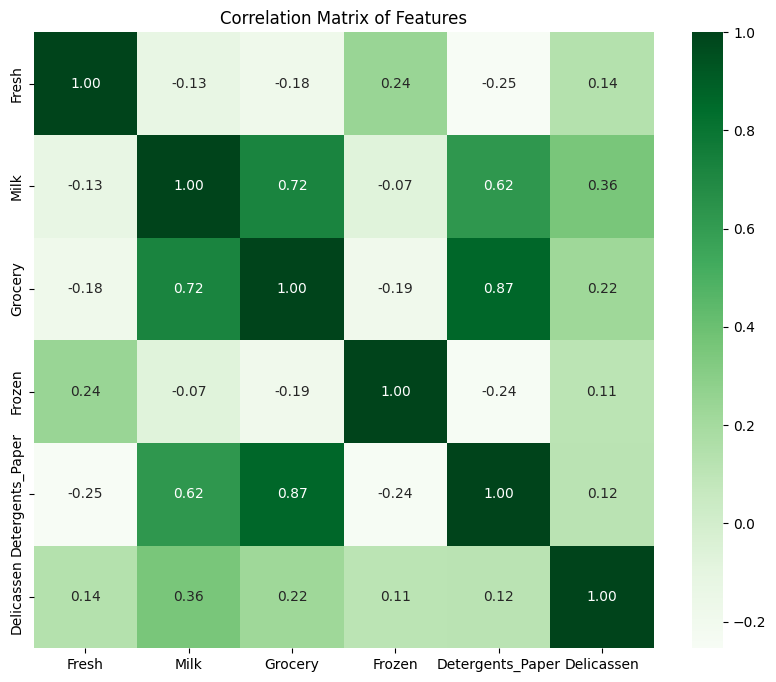

In [43]:
# correlation matrix
correlation_matrix = Wholesale_df_filtered.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.savefig('correlation_matrix of features.png')
plt.show()

## Histogram

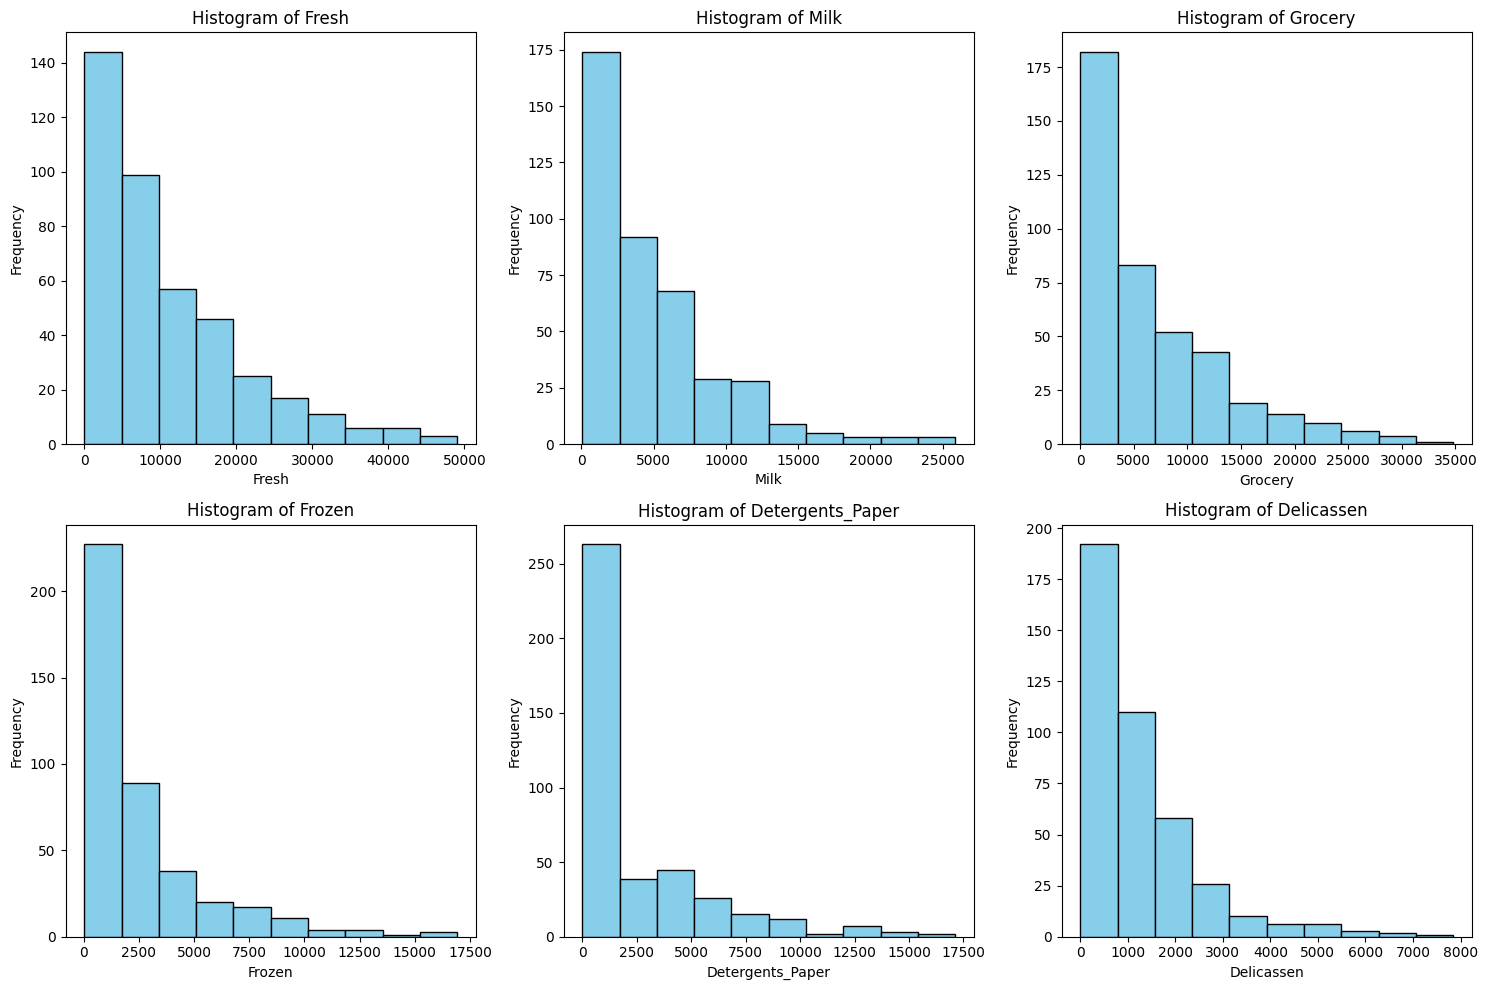

In [44]:
# Histogram for each feature or column
plt.figure(figsize=(15, 10))
for i, col in enumerate(Wholesale_df_filtered.columns):
    plt.subplot(2, 3, i + 1)  # Adjust subplot grid as needed
    plt.hist(Wholesale_df_filtered[col], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig('Histogram of each feature.png')
plt.show()

## Scatter Plot

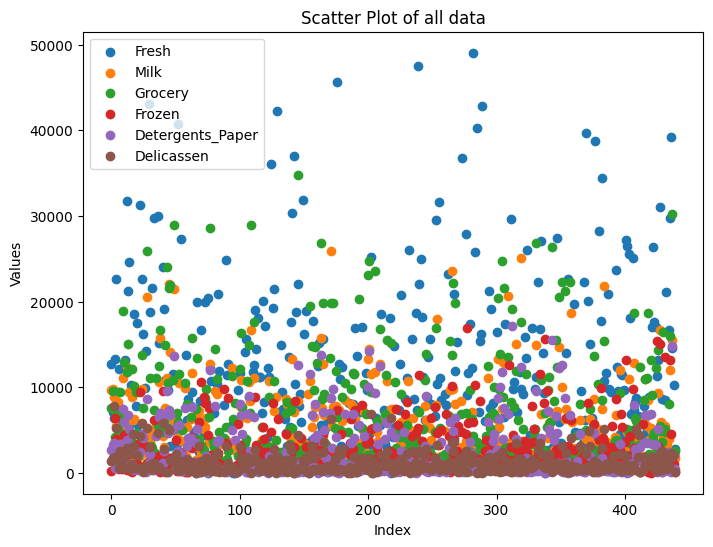

In [45]:
# Scatter plot
plt.figure(figsize=(8,6))
for column in Wholesale_df_filtered.columns:
    plt.scatter(Wholesale_df_filtered.index, Wholesale_df_filtered[column], label=column)

plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Scatter Plot of all data")
plt.legend()
plt.savefig('Scatter Plot of all data.png')
plt.show()

# 4) K-Means Clustering

## Elbow Method

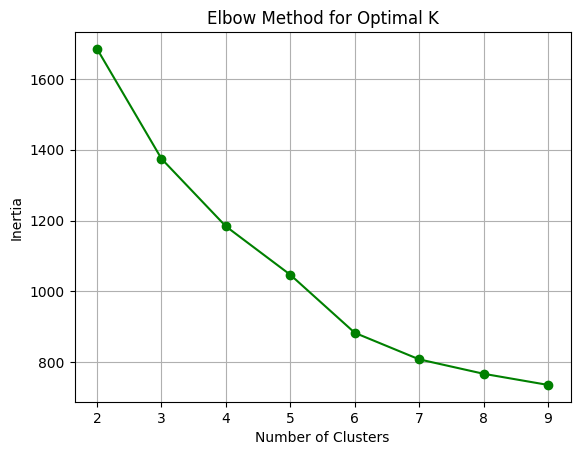


 Optimal number of clusters (K) is: 3


In [47]:
# Clustering - Finding Optimal Clusters using Elbow Method
# Empty list
inertia = []

# range of k to test
k_values = range(2, 10)
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    inertia.append(model.inertia_)

# Plot
plt.plot(k_values, inertia, marker='o', color='green')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.savefig('Elbow Method for Optimal K.png')
plt.show()

# Identify the optimal K using the "elbow" method
diff = np.diff(inertia)
k_optimal = k_values[np.argmin(diff) + 1]

print(f"\n Optimal number of clusters (K) is: {k_optimal}")

In [48]:
# Applying K-Means Clustering
model = KMeans(n_clusters=3, random_state=42, n_init=10)

# clusters (y) Output
clusters = model.fit_predict(df_scaled)
clusters[:10]

array([0, 1, 1, 2, 2, 0, 0, 0, 0, 1], dtype=int32)

In [49]:
# Add cluster Column to the dataset
Wholesale_df_filtered['Cluster'] = clusters
Wholesale_df_filtered.head()

<ipython-input-49-cad99edf550d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wholesale_df_filtered['Cluster'] = clusters


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,2
4,22615,5410,7198,3915,1777,5185,2


In [50]:
cluster1 = Wholesale_df_filtered[Wholesale_df_filtered['Cluster'] == 0]
cluster1.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,0
5,9413,8259,5126,666,1795,1451,0
6,12126,3199,6975,480,3140,545,0
7,7579,4956,9426,1669,3321,2566,0
8,5963,3648,6192,425,1716,750,0


In [51]:
cluster2 = Wholesale_df_filtered[Wholesale_df_filtered['Cluster'] == 1]
cluster2.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
9,6006,11093,18881,1159,7425,2098,1
10,3366,5403,12974,4400,5977,1744,1
12,31714,12319,11757,287,3881,2931,1


In [52]:
cluster3 = Wholesale_df_filtered[Wholesale_df_filtered['Cluster'] == 2]
cluster3.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
3,13265,1196,4221,6404,507,1788,2
4,22615,5410,7198,3915,1777,5185,2
18,18601,6327,10099,2205,2767,3181,2
22,31276,1917,4469,9408,2381,4334,2
29,43088,2100,2609,1200,1107,823,2


## Silhouette Score

In [53]:
# Compute silhouette score
sil_score = silhouette_score(df_scaled, clusters)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.31276625499121974


## Visualize Clusters

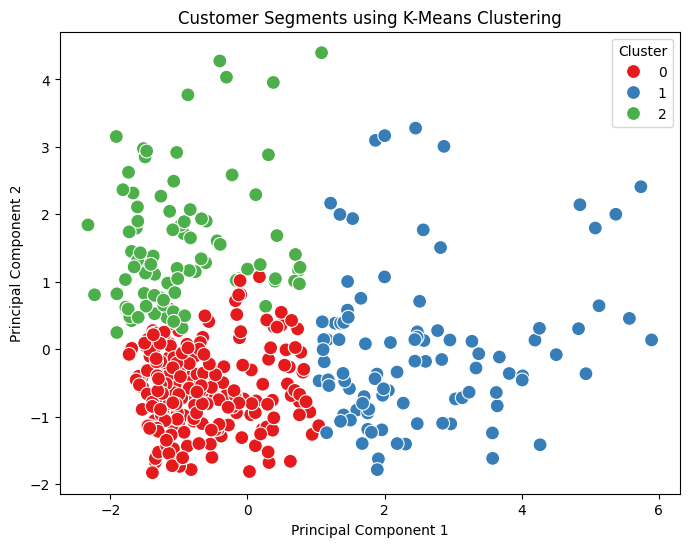

In [54]:
# Visualizing Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=clusters, palette="Set1", s=100)
plt.title("Customer Segments using K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.savefig('Customer Segments using K-Means Clustering.png')
plt.show()

In [55]:
# Analyze Clusters
cluster_mean=Wholesale_df_filtered.groupby("Cluster").mean()
cluster_mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,8120.034632,2888.580087,3826.948052,1699.017316,1039.419913,827.878788
1,5765.968421,10671.915789,16153.989474,1502.189474,7092.031579,1768.063158
2,22854.238636,3816.829545,4572.272727,5914.511364,781.090909,1742.056818


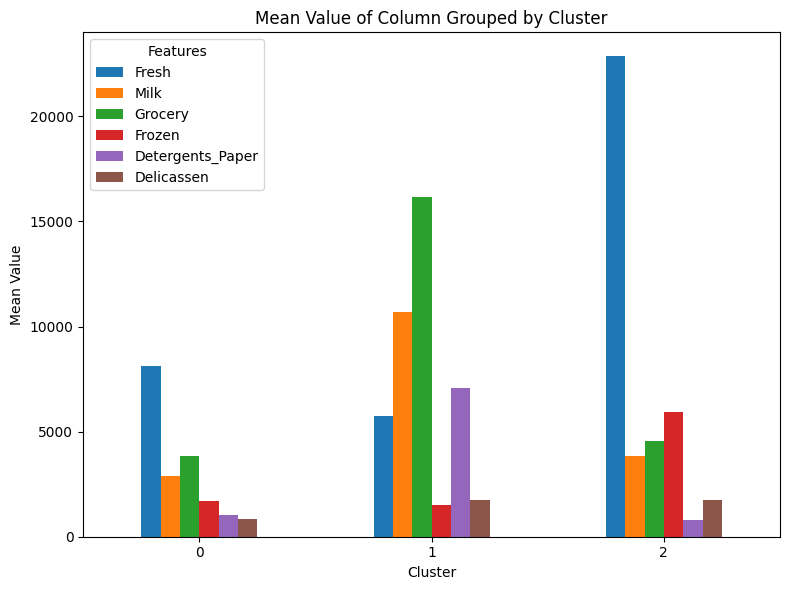

In [56]:
# Create the column plot
cluster_mean.plot(kind='bar', figsize=(8, 6))
plt.title('Mean Value of Column Grouped by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Features')
plt.tight_layout()
plt.savefig('Mean Value of Column Grouped by Cluster.png')
plt.show()

#5) Interpretation & Business Insights


Cluster 0: **Regular Customers** (Low spending across categories)
 - Insight: These customers are consistent but may not be high-value.
 - Action: Implement loyalty programs, targeted promotions for higher-value products, and personalized recommendations to encourage increased spending.

Cluster 1: **Moderate-Volume Retailers** (Average spending on all product categories)
 - Insight: Key revenue generators; crucial for retention.
 - Action: Offer exclusive discounts and premium services to maintain prevent churn.  Prioritize customer success management.

Cluster 2: **Fresh Wholesalers** (High spending on fresh products)
 - Insight: Specialize in fresh goods.
 - Action: Focus on quality and freshness of products; offer competitive pricing and bulk discounts. Explore complementary products.
